In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
def preprocessing(df, cols):
    df['Position_Label'] = df['Position']
    for i, val in enumerate(df['Position'].unique()):
        df['Position_Label'] = df['Position_Label'].replace(val, i)

    df['stat'] = df['stat'].str.replace(",", "").astype(int)

    return df[cols]

In [3]:
# read and preprocess data
cols = [
    "Player Name",
    "Height",
    "Weight",
    "overall_rating",
    "potential_rating",
    "stat",
    "Position_Label"
]
df = pd.read_csv("players.csv")
fifa_df = preprocessing(df, cols)

In [4]:
names = fifa_df[fifa_df.columns[:1]]
names[:10]

,Player Name
0,Kevin De Bruyne
1,Erling Haaland
2,Rúben Dias
3,Ederson
4,Bernardo Silva
5,Rodri
6,João Cancelo
7,Aymeric Laporte
8,Riyad Mahrez
9,İ. Gündoğan


In [5]:
df_temp = fifa_df[fifa_df.columns[3:]]
df_temp = df_temp[df_temp.columns[:-1]]
df_temp[:10]

,overall_rating,potential_rating,stat
0,91,91,2299
1,90,94,2144
2,88,91,1888
3,88,90,1572
4,88,88,2210
5,87,89,2133
6,87,87,2252
7,86,87,1962
8,85,85,2049
9,85,85,2191


In [6]:
# data normalization
from sklearn import preprocessing

df_temp = fifa_df[fifa_df.columns[3:]]
df_temp = df_temp[df_temp.columns[:-1]]

x = df_temp.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [7]:
X_norm[:10]

,0,1,2
0,1.000000,0.914894,0.979644
1,0.977273,0.978723,0.881043
2,0.931818,0.914894,0.718193
3,0.931818,0.893617,0.517176
4,0.931818,0.851064,0.923028
5,0.909091,0.872340,0.874046
6,0.909091,0.829787,0.949746
7,0.886364,0.829787,0.765267
8,0.863636,0.787234,0.820611
9,0.863636,0.787234,0.910941


Deciding how many Clusters should be used

In [ ]:
wcss = []

for i in range(1, 15):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X_norm)
  wcss.append(kmeans.inertia_)

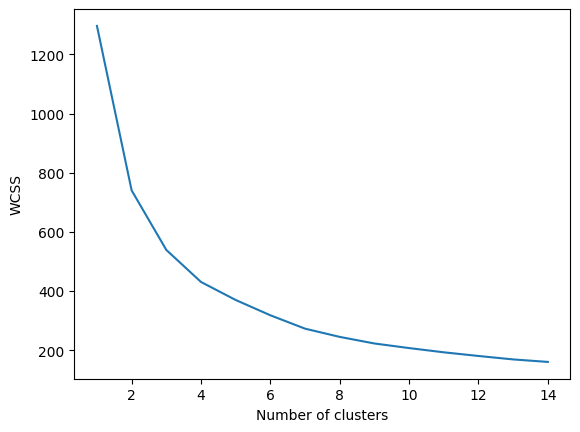

In [9]:
plt.plot(range(1, 15), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [10]:
# specify the number of clusters
kmeans = KMeans(n_clusters=8, init="k-means++", random_state=42)

# fit the input data
kmeans = kmeans.fit(X_norm)

# get the cluster labels
labels = kmeans.predict(X_norm)

# centroid values
centroid = kmeans.cluster_centers_

# cluster values
clusters = kmeans.labels_.tolist()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
X_norm['cluster'] = clusters
X_norm['name'] = names
X_norm.columns = ['Overall Rating', 'Potential', 'Stats', 'cluster', 'name']
X_norm[:10]

,Overall Rating,Potential,Stats,cluster,name
0,1.000000,0.914894,0.979644,5,Kevin De Bruyne
1,0.977273,0.978723,0.881043,5,Erling Haaland
2,0.931818,0.914894,0.718193,5,Rúben Dias
3,0.931818,0.893617,0.517176,5,Ederson
4,0.931818,0.851064,0.923028,5,Bernardo Silva
5,0.909091,0.872340,0.874046,5,Rodri
6,0.909091,0.829787,0.949746,5,João Cancelo
7,0.886364,0.829787,0.765267,5,Aymeric Laporte
8,0.863636,0.787234,0.820611,5,Riyad Mahrez
9,0.863636,0.787234,0.910941,5,İ. Gündoğan


In [12]:
X_norm['cluster'].nunique()

8

In [13]:
cluster_count = X_norm.groupby('cluster')['name'].nunique().reset_index()

sorted_cluster_counts = cluster_count.sort_values('cluster')

sorted_cluster_counts.rename(columns = {'name':'Player Count'})

,cluster,Player Count
0,0,1100
1,1,3361
2,2,1635
3,3,4443
4,4,2626
5,5,1788
6,6,2396
7,7,927


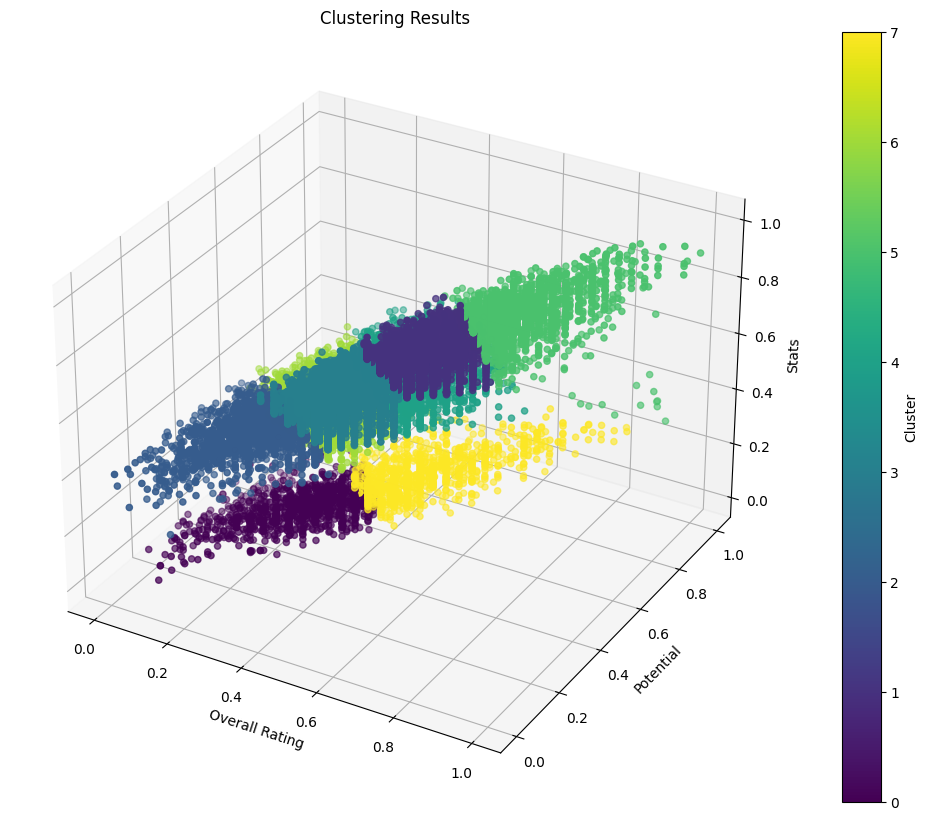

In [14]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_norm['Overall Rating'],
    X_norm['Potential'],
    X_norm['Stats'],
    c=X_norm['cluster'],
    cmap='viridis'
)
ax.set_xlabel('Overall Rating')
ax.set_ylabel('Potential')
ax.set_zlabel('Stats')
ax.set_title('Clustering Results')

# Create a colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('Cluster')

plt.show()

In [15]:
df_val_for_scatter = X_norm.sample(n = 30)
df_val_for_scatter

,Overall Rating,Potential,Stats,cluster,name
5869,0.522727,0.468085,0.739822,1,Adrien Hunou
11131,0.477273,0.425532,0.739186,1,Dan Nistor
6728,0.295455,0.468085,0.360687,6,Jeison Mina
12374,0.454545,0.404255,0.583333,3,Jefre Vargas
10194,0.227273,0.468085,0.331425,6,Oliver Denham
8019,0.454545,0.510638,0.402672,6,Anderson Angulo
11242,0.409091,0.468085,0.601781,3,Genaro
7153,0.590909,0.595745,0.667303,1,Nahuel Barrios
17825,0.090909,0.063830,0.331425,2,Yi Guo
9902,0.454545,0.553191,0.683842,1,G. Papanikolaou


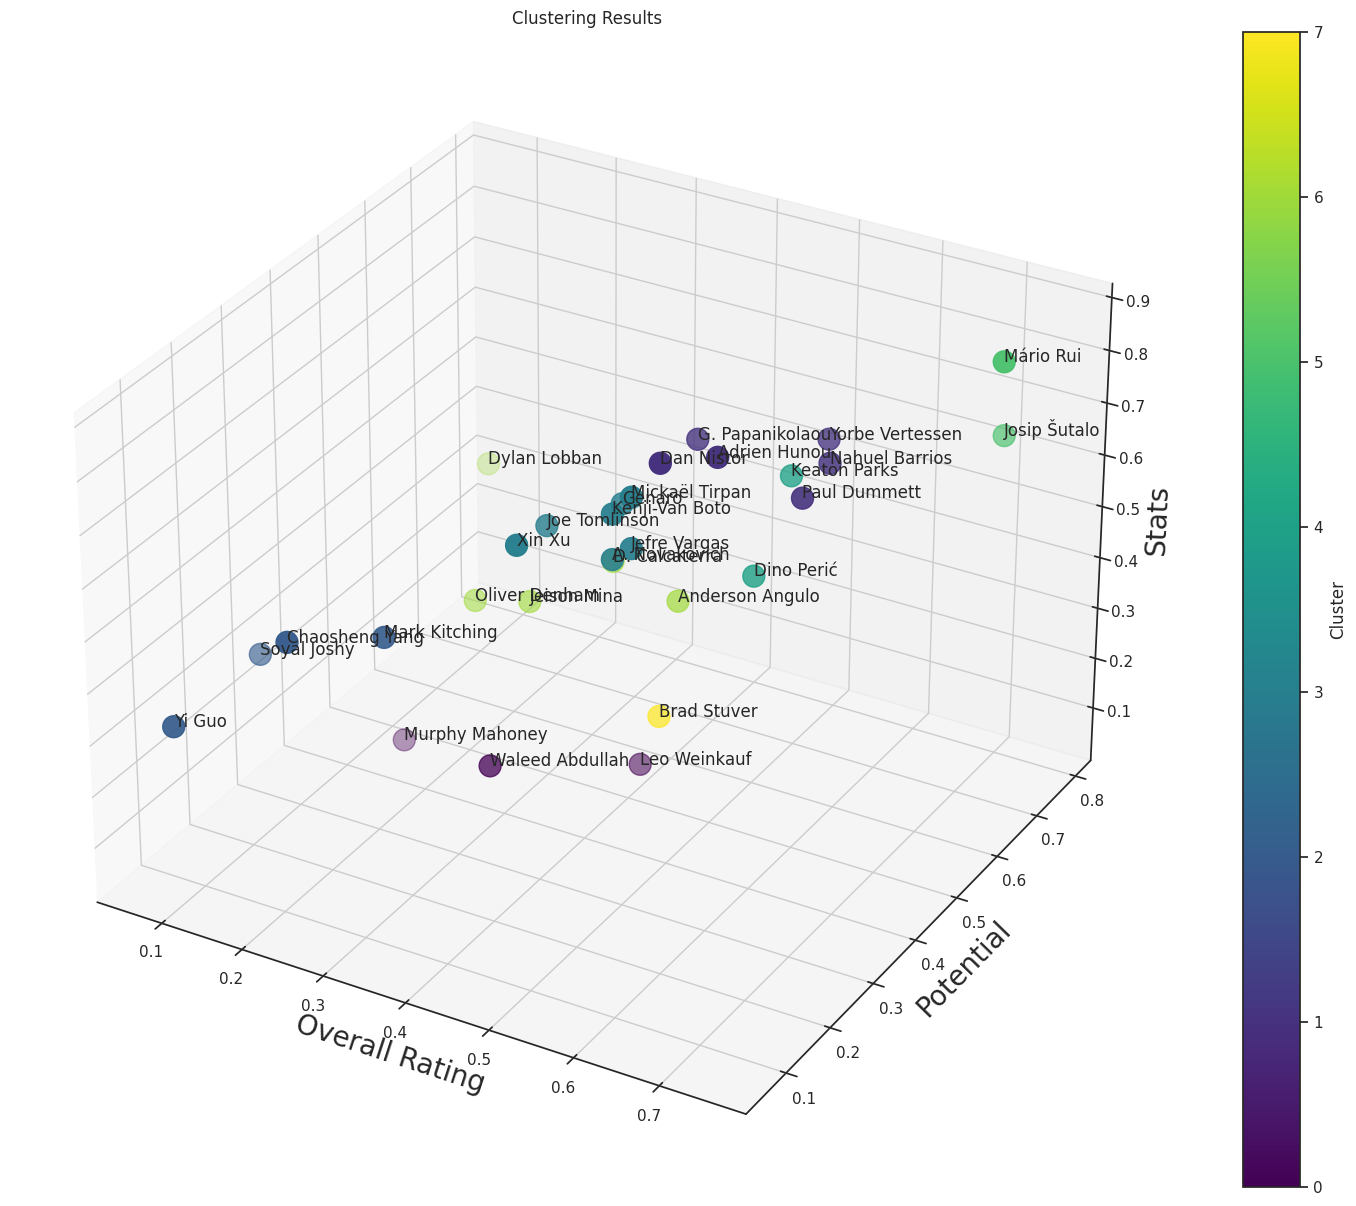

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

sns.set(style="white")

# Create a 3D scatter plot
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    df_val_for_scatter['Overall Rating'],
    df_val_for_scatter['Potential'],
    df_val_for_scatter['Stats'],
    c=df_val_for_scatter['cluster'],
    cmap='viridis',
    s=250
)

# Add labels to data points
texts = []
for x, y, z, s in zip(df_val_for_scatter['Overall Rating'], df_val_for_scatter['Potential'], df_val_for_scatter['Stats'], df_val_for_scatter['name']):
    texts.append(ax.text(x, y, z, s))

# Set plot limits and labels
ax.set_xlabel('Overall Rating', fontsize=20)
ax.set_ylabel('Potential', fontsize=20)
ax.set_zlabel('Stats', fontsize=20)
ax.set_title('Clustering Results')

# Create a colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('Cluster')

# Show the plot
plt.show()


In [17]:
import heapq

# Input player's features
input_features = [89, 89, 2208]  # Example features: Overall Rating, Potential, Stats

# Scale the input features using the same scaler used for normalization
scaled_input_features = scaler.transform([input_features])

# Predict the nearest centroid for the input features
nearest_centroid = kmeans.predict(scaled_input_features)

# Calculate the distances from the input features to all centroids
distances = np.linalg.norm(kmeans.cluster_centers_ - scaled_input_features, axis=1)

# Find the indices of the players belonging to the nearest centroid
nearest_indices = np.where(kmeans.labels_ == nearest_centroid)[0]

# Compute the distances from the input features to all players in the nearest cluster
nearest_distances = np.linalg.norm(X_norm.iloc[nearest_indices, :-2] - scaled_input_features, axis=1)

# Retrieve the top k nearest players
k = 5  # Number of nearest players to retrieve
top_k_indices = heapq.nsmallest(k, range(len(nearest_distances)), nearest_distances.take)

# Retrieve the player details for the top k nearest players
nearest_players = fifa_df.iloc[nearest_indices[top_k_indices]]

print("Input Features:")
print("Overall Rating:", input_features[0])
print("Potential:", input_features[1])
print("Stats:", input_features[2])
print()

print("Top", k, "Nearest Players:")
for i, player in nearest_players.iterrows():
    print("----------------------")
    print("Player Name:", player['Player Name'])
    print("Height:", player['Height'])
    print("Weight:", player['Weight'])
    print("Overall Rating:", player['overall_rating'])
    print("Potential:", player['potential_rating'])
    print("Stats:", player['stat'])

Input Features:
Overall Rating: 89
Potential: 89
Stats: 2208

Top 5 Nearest Players:
----------------------
Player Name: Mohamed Salah
Height: 70.8
Weight: 157
Overall Rating: 89
Potential: 89
Stats: 2208
----------------------
Player Name: Harry Kane
Height: 74.4
Weight: 196
Overall Rating: 89
Potential: 89
Stats: 2193
----------------------
Player Name: Casemiro
Height: 73.2
Weight: 185
Overall Rating: 89
Potential: 89
Stats: 2251
----------------------
Player Name: Bernardo Silva
Height: 69.6
Weight: 141
Overall Rating: 88
Potential: 88
Stats: 2210
----------------------
Player Name: Neymar Jr
Height: 70.8
Weight: 150
Overall Rating: 89
Potential: 89
Stats: 2156
